VGG16 is a convolutional neural network (CNN) architecture that’s considered to be one of the best computer vision model architectures to date. It specializes in image classification and image recognition for a wide range of images.

VGG16 is a convolutional neural network model that’s used for image recognition. It’s unique in that it has only 16 layers that have weights, as opposed to relying on a large number of hyper-parameters. It’s considered one of the best vision model architectures.

In VGG16, ‘VGG’ refers to the Visual Geometry Group of the University of Oxford, while the ‘16’ refers to the network’s 16 layers that have weights. This network is a pretty large network, and it has about 138 million parameters.

In [10]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical





In [11]:
import os
file_path = "/mnt/c/Users/ASUS/Downloads/scene_detection/scene_detection"
train_dir = "/mnt/c/Users/ASUS/Downloads/scene_detection/scene_detection/seg_train/seg_train"
validation_dir = "/mnt/c/Users/ASUS/Downloads/scene_detection/scene_detection/seg_test/seg_test"

categories = ['buildings', 'forest', 'glacier', 'mountain', 'forest', 'buildings']
train_categories = os.listdir(train_dir)
validation_categories = os.listdir(validation_dir)

print(train_categories)
print(validation_categories)


['buildings', 'forest', 'glacier', 'mountain', 'sea']
['buildings', 'forest', 'glacier', 'mountain', 'sea']


In [12]:
# Image parameters
BATCH_SIZE = 16

# Data augmentation & preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_data = datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=16, class_mode='categorical', shuffle=True)
val_data = datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=16, class_mode='categorical', shuffle=True)




Found 10644 images belonging to 5 classes.
Found 2499 images belonging to 5 classes.


In [5]:
train_data.class_indices , val_data.class_indices

({'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4},
 {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4})

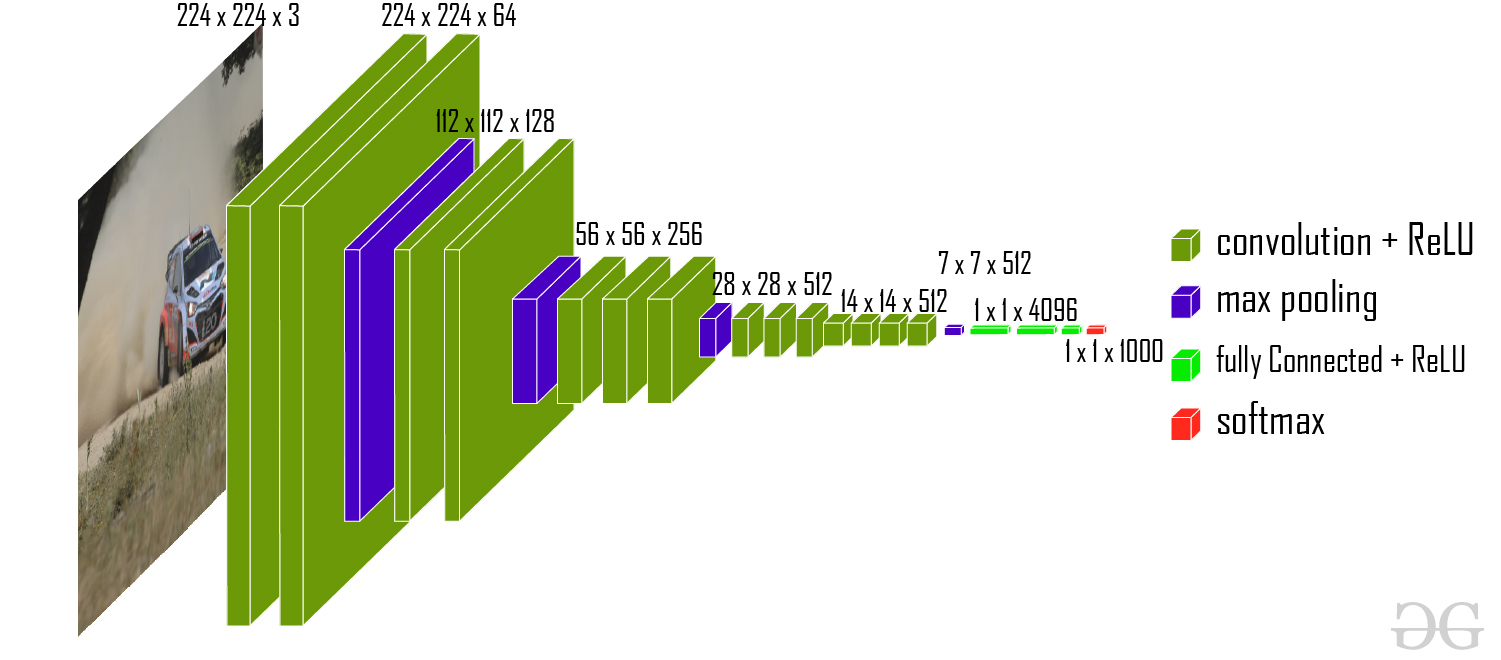

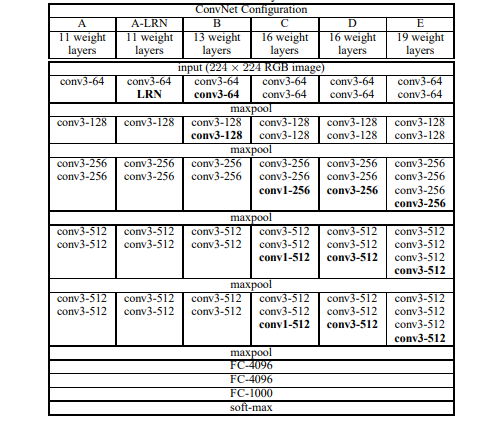

In [17]:

# Load VGG16 without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))




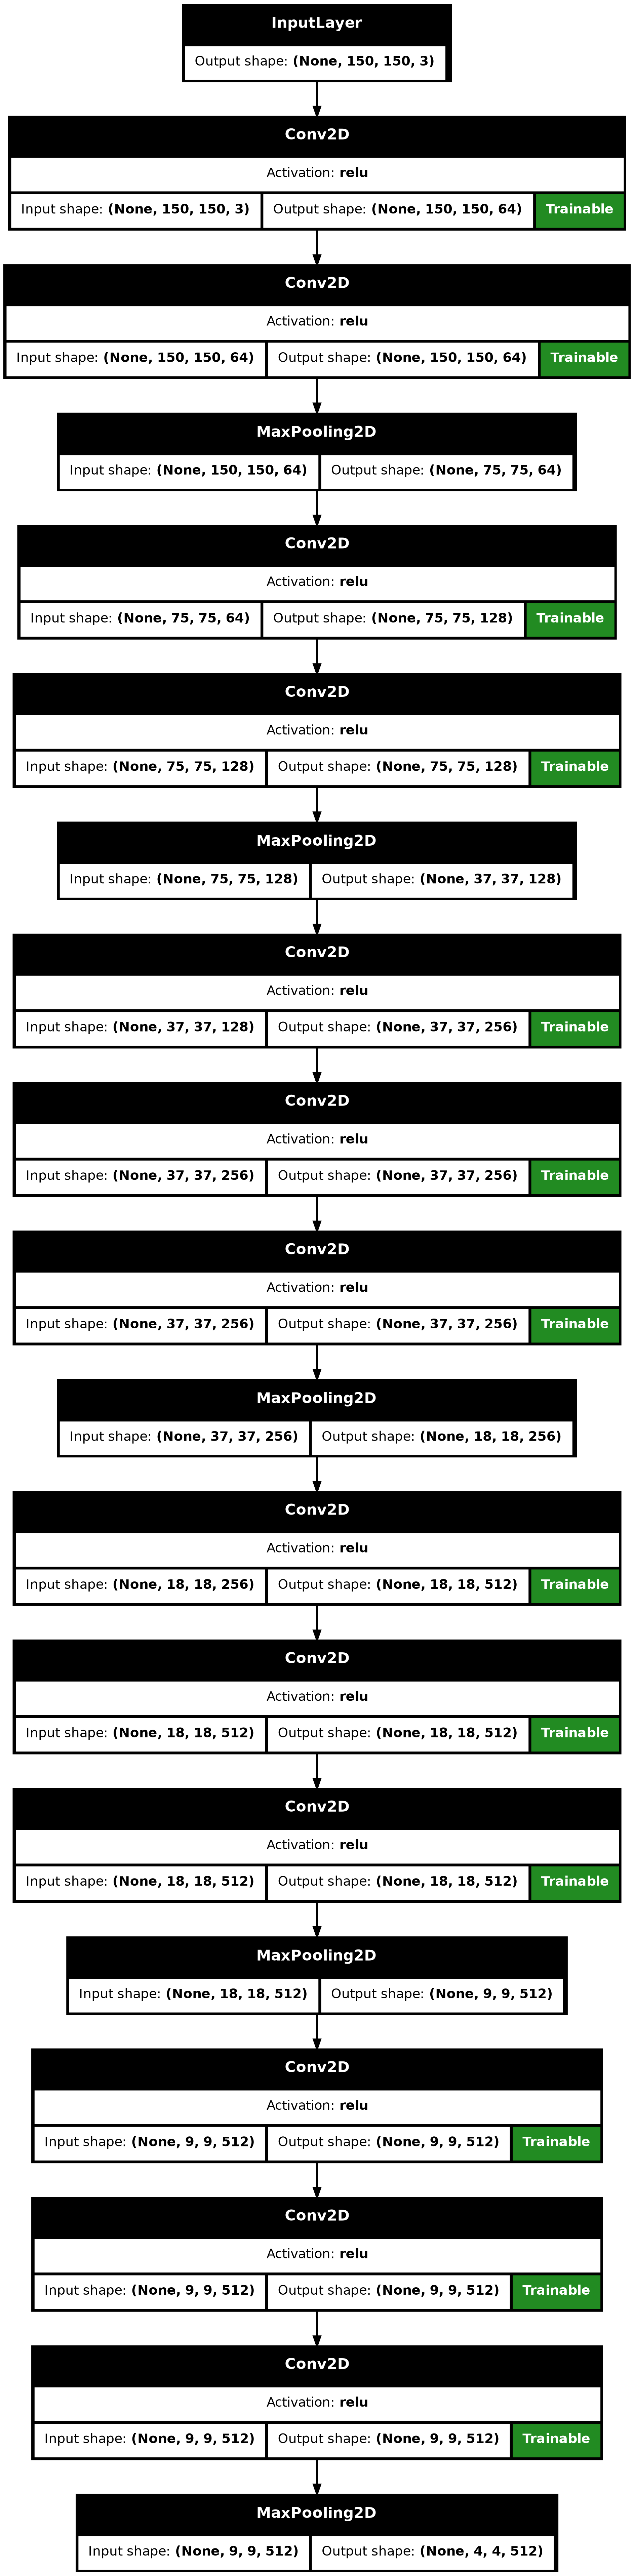

In [18]:
tf.keras.utils.plot_model(base_model, show_shapes=True, show_layer_activations=True, show_trainable=True, to_file='vgg16.png')

In [19]:
# Custom classifier
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
out = Dense(len(train_data.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=out)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [20]:

# TensorBoard callback
log_dir = "logs/vgg16_coco"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True)

history = model.fit(train_data, validation_data=val_data, batch_size=BATCH_SIZE, epochs=10, callbacks=[tensorboard_callback])




/home/kelvin/miniconda3/envs/linux-deep-gpu/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 0.6688 - loss: 0.8342

/home/kelvin/miniconda3/envs/linux-deep-gpu/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-03-16 16:32:13.357025: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 566231040 exceeds 10% of free system memory.
2025-03-16 16:32:13.697787: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 566231040 exceeds 10% of free system memory.
2025-03-16 16:32:14.030407: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 566231040 exceeds 10% of free system memory.
2025-03-16 16:32:14.301243: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 566231040 exceeds 10% of free sy

666/666 ━━━━━━━━━━━━━━━━━━━━ 416s 591ms/step - accuracy: 0.6690 - loss: 0.8339 - val_accuracy: 0.8715 - val_loss: 0.3568
Epoch 2/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 295s 442ms/step - accuracy: 0.8696 - loss: 0.3768 - val_accuracy: 0.8872 - val_loss: 0.3390
Epoch 3/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 292s 438ms/step - accuracy: 0.8944 - loss: 0.3173 - val_accuracy: 0.8880 - val_loss: 0.3292
Epoch 4/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 200s 301ms/step - accuracy: 0.9015 - loss: 0.2955 - val_accuracy: 0.8924 - val_loss: 0.3171
Epoch 5/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 201s 301ms/step - accuracy: 0.9060 - loss: 0.2800 - val_accuracy: 0.9144 - val_loss: 0.2496
Epoch 6/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 203s 304ms/step - accuracy: 0.9093 - loss: 0.2582 - val_accuracy: 0.9112 - val_loss: 0.2507
Epoch 7/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 199s 298ms/step - accuracy: 0.9196 - loss: 0.2393 - val_accuracy: 0.9028 - val_loss: 0.2716
Epoch 8/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 201s 301ms/step - accuracy: 0.9272 - loss: 0.21

In [21]:
# Evaluate
loss, accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {accuracy:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 236ms/step - accuracy: 0.9192 - loss: 0.2353
Validation Accuracy: 0.9148


157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 238ms/step


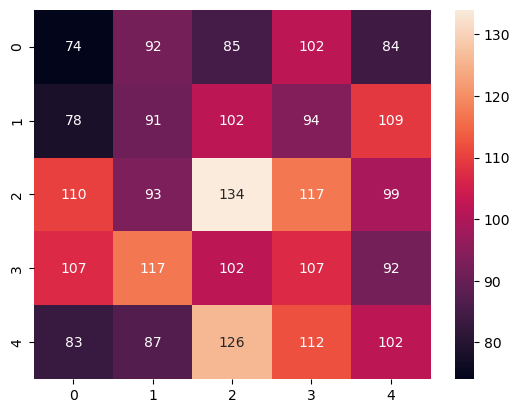

In [22]:
# Confusion matrix
preds = model.predict(val_data)
y_pred = np.argmax(preds, axis=1)
y_true = val_data.classes
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()



In [23]:
# Classification report
print(classification_report(y_true, y_pred, target_names=val_data.class_indices.keys()))



              precision    recall  f1-score   support

   buildings       0.16      0.17      0.17       437
      forest       0.19      0.19      0.19       474
     glacier       0.24      0.24      0.24       553
    mountain       0.20      0.20      0.20       525
         sea       0.21      0.20      0.20       510

    accuracy                           0.20      2499
   macro avg       0.20      0.20      0.20      2499
weighted avg       0.20      0.20      0.20      2499



In [24]:
# MobileNetV2 for comparison
base_mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
for layer in base_mobilenet.layers:
    layer.trainable = False
x = GlobalAveragePooling2D()(base_mobilenet.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
out = Dense(len(train_data.class_indices), activation='softmax')(x)

mobilenet_model = Model(inputs=base_mobilenet.input, outputs=out)
mobilenet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])



/tmp/ipykernel_3823/4252179380.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [25]:
# Train MobileNet
mobilenet_history = mobilenet_model.fit(train_data, validation_data=val_data,batch_size=BATCH_SIZE, epochs=10, callbacks=[tensorboard_callback])



Epoch 1/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 256s 352ms/step - accuracy: 0.6756 - loss: 0.8797 - val_accuracy: 0.8463 - val_loss: 0.3868
Epoch 2/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 209s 314ms/step - accuracy: 0.8456 - loss: 0.4153 - val_accuracy: 0.8651 - val_loss: 0.3533
Epoch 3/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 202s 303ms/step - accuracy: 0.8621 - loss: 0.3762 - val_accuracy: 0.8752 - val_loss: 0.3397
Epoch 4/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 217s 325ms/step - accuracy: 0.8675 - loss: 0.3533 - val_accuracy: 0.8735 - val_loss: 0.3277
Epoch 5/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 218s 327ms/step - accuracy: 0.8822 - loss: 0.3337 - val_accuracy: 0.8715 - val_loss: 0.3538
Epoch 6/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 220s 330ms/step - accuracy: 0.8778 - loss: 0.3192 - val_accuracy: 0.8703 - val_loss: 0.3395
Epoch 7/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 215s 323ms/step - accuracy: 0.8822 - loss: 0.3103 - val_accuracy: 0.8824 - val_loss: 0.3257
Epoch 8/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 215s 322ms/step - accuracy: 0.8836 -

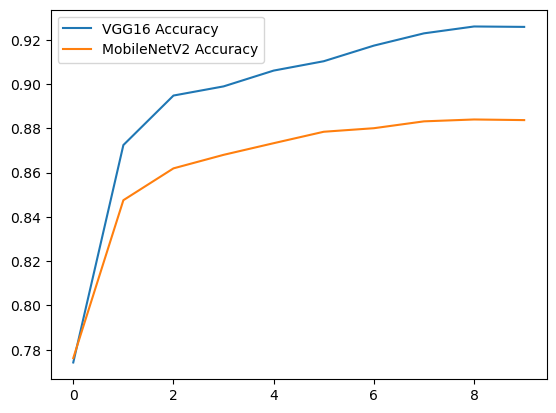

In [28]:

# Compare performance
plt.plot(history.history['accuracy'], label='VGG16 Accuracy')
plt.plot(mobilenet_history.history['accuracy'], label='MobileNetV2 Accuracy')
plt.legend()
plt.show()

In [32]:
# %load_ext tensorboard
%tensorboard --logdir logs/vgg16_coco

Reusing TensorBoard on port 6007 (pid 12975), started 0:00:16 ago. (Use '!kill 12975' to kill it.)